# Neural style transfer

Using deep learning, we are going to transfer the style of famous painters like Van Gogh to your own pics. Deep Art or neural style transfer is a great way to style your photos. 

This tutorial uses the pre-trained Arbitrary Image Stylization model from TensorFlow Hub.

This algorithm optimizes each image to get the style you want. So, we have two images: the content image and the style image(like a Picasso painting). This algorithm blends both images together so the output image looks like the content image but with the style of Picasso (or another famous artist). 

This algorithm optimizes the output image to match the statistics of both images (content and style images). We use a convolutional network (CNN) to get these statistics. 



# Setup

First, we are going to import some libraries like *TensorFlow, IPython, matplotlib, numpy, PIL, time,* and *functools*. 

*TensorFlow* is used to make machine learning models. 

*Numpy* is a library used to do matrix math. 

*Ipython.display* is a library to display graphs. 

*Matplotlib* is a library to show graphs. 

Note: As you know, every image is a numerical matrix that represents each pixel. So, we use the *Numpy* library to manipulate images with matrix math. In fact, *machine learning* consists of matrix multiplications. 



In [1]:
import tensorflow as tf
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools



In machine learning, we use tensors to represent images. The next function receives a tensor and returns an image. 

In [ ]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

Now, we are going to download our content and style image. 

You can use your own images. You just have to save it in the content folder. Go to **Files** (Folder icon) and then go to the **content** folder. Then, you have to upload your images. We recommend you to save your images as *content.jpg* and *style.jpg*. For this step, you must have to comment on the first two lines and uncomment the last two lines.



In [ ]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path = tf.keras.utils.get_file('picasso.jpg','https://github.com/diveintodeeplearning/Free-Tutorials/blob/main/images/picasso.jpg?raw=true')


#content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
#style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

#content_path="content.jpg"
#style_path="style.jpg"

303104/299742 [==============================] - 0s 0us/step


We're now going to define a function to load an image and limit its maximum dimension to 512 pixels. 
First, we define that the maximum dimension (max_dim) is 512 pixels. Then, we use *tf.io.reade_file* to load the image. Then, we decode the image, which means that the image has three channels (RGB). The color images have three layers (3 numerical matrices) that represent the RGB (Red, Blue, and Green) channels. Then we are going to convert (cast) the image to *tf.float32* type. 

Then, we are going to save the shape of the image in the shape variable. Then we are going to define some variables (like *shape, long_dim,* and *scale*) to reshape (or *resize*) our images and avoid shape problems later in our CNN model. 

Then, we reshape the image and return it.

In [ ]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In this step, we define a simple function to display an image. For this, we are using *matplotlib* library and its *imshow* function. 

In [ ]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

Now, we use the load_img function to load both images: *content_image* and *style_image*.

Then, we are going to show these images using the *subplot* function of the *matplotlib* library. 

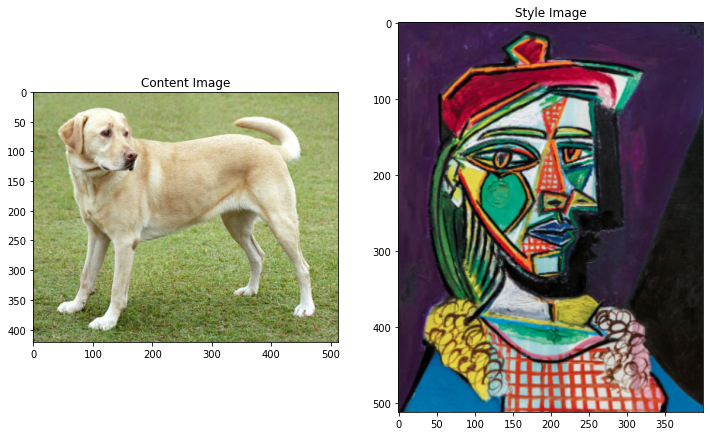

In [ ]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

## Fast Style Transfer using TF-Hub

In this step, we are going to create our first styled image. We are going to use *TF-Hub*, which is a module for fast artistic style transfer. 

First, we are going to use the *TensorFlow-hub* library. Then, we are going to load the hub module. Then, we are going to use the *hub_model*, the *content*, and *style* images to create a *stylized_image*.

Note: we used the *tensor_to_image* function to show the *stylized_image*. 

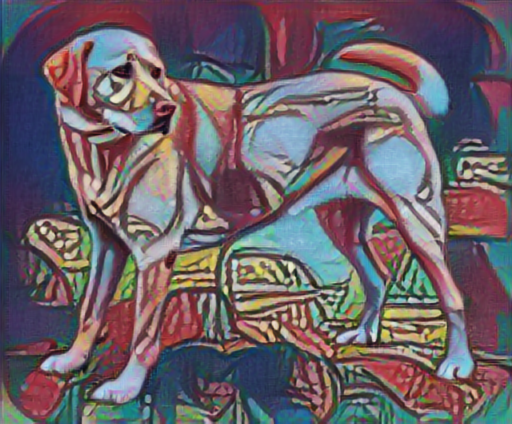

In [ ]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

Now, we are going to use a pre-trained model called *VGG19*. This pre-trained *Keras* model is a *deep learning* model with pre-trained weights that are often used for prediction, feature extraction, and fine-tuning. 

In this tutorial, we are going to use the intermediate layers of our model to get the content and style representations of the image.

The first few layer activations (starting from the input layer) represent low-level features like edges and textures.   

The final few layers represent higher-level features-object parts like eyes (in case of a face image). 

In style transfer, we are going to use this pre-trained image classification network (*VGG19*). The intermediate layers are used to define the representation of content and style from the images. We are going to use this model to try to match the style and content target representations.

First, we are going to preprocess the content image and resize it (to avoid shape problems). Then, we are going to load the *VGG19* model in the *vgg* variable. Then, we are going to feed the *vgg* model with the pre-processed content image (*x*). Then, we are going to print its shape. 









In [ ]:
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

574717952/574710816 [==============================] - 4s 0us/step


TensorShape([1, 1000])

In this step, we are going to show the top 5 classification predictions of this content image using the *VGG19* model.  

In [ ]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

40960/35363 [==================================] - 0s 0us/step


[('Labrador_retriever', 0.49317285),
 ('golden_retriever', 0.23665173),
 ('kuvasz', 0.03635726),
 ('Chesapeake_Bay_retriever', 0.024182761),
 ('Greater_Swiss_Mountain_dog', 0.018646063)]

Now, we are going to load the *VGG19* model without the classification head, and list the layer names

In [ ]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name)

80142336/80134624 [==============================] - 0s 0us/step

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


The next step is to choose intermediate layers from the *VGG19* model to represent the style and content of the image. Then, we are going to define the number of content layers and the number of style layers. 


In [ ]:
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

#### Intermediate layers for style and content:

As you know, we are using the intermediate outputs within the *VGG19* model to define style and content representation.

A Convolutional Neural Network (*CNN*) is used for *image classification*. This is possible because *CNN* is able to understand the image. The *CNN* model is feed with the image as input pixels to convert it into a complex understanding of the image features.  

A *CNN* is able to capture the invariances and defining features within classes (like cats and dogs) that has a noisy background. *CNN* is a feature extractor. We are going to use the pre-trained *CNN* to describe the content and style images. 


### Build the model 

In this tutorial, we are using the *VGG19* model to do a fast-style-transfer model. When we use a pre-trained model, we have the option to only use some pre-trained layers. For this, we extract the intermediate layer values using Keras functional *API*. 


To define a model using *Keras* functional *API*, specify the inputs and outputs:

`model = Model(inputs, outputs)`

The next function builds a *VGG19* model that returns a list of intermediate layer outputs. First, it defines the *VGG19* model without the input layer and its pre-trained weights. Then, this model is set to not be trainable, which means that we are going to freeze the network (weights) before compiling the model. Then, we are going to get the intermediate layer outputs. Then, we are going to define the model using the *VGG19* input and its intermediate layer outputs. 

In [ ]:
def vgg_layers(layer_names):
  """ Creates a vgg model that returns a list of intermediate output values."""
  # Load our model. Load pretrained VGG, trained on imagenet data
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  
  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model

Now, we are going to create the model.

First, we are going to use the *vgg_layers* function to create a *vgg* model. Then, we are going to feed the *style_extractor* model with *style_image* to get the *style_outputs*. Then, we are going to look at the statistics of each layer's output. 

In [ ]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

#Look at the statistics of each layer's output
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())
  print()

block1_conv1
  shape:  (1, 512, 400, 64)
  min:  0.0
  max:  798.2426
  mean:  24.094349

block2_conv1
  shape:  (1, 256, 200, 128)
  min:  0.0
  max:  4264.9204
  mean:  139.46848

block3_conv1
  shape:  (1, 128, 100, 256)
  min:  0.0
  max:  7773.542
  mean:  161.73181

block4_conv1
  shape:  (1, 64, 50, 512)
  min:  0.0
  max:  18532.033
  mean:  512.61066

block5_conv1
  shape:  (1, 32, 25, 512)
  min:  0.0
  max:  2526.053
  mean:  42.082363



## Calculate style

The content of an image is represented by the values of the intermediate feature maps.


To calculate style, we are going to use the correlation and mean formulas. We use the correlation formula to know if one chunk of the image is correlated to another chunk. By doing this math, we easily know how much one chunk of the image is related to another chunk. 

For this, we calculate a Gram matrix that includes this information by taking the outer product of the feature vector with itself at each location and averaging that outer product over all locations. This Gram matrix can be calculated for a particular layer as:

$$G^l_{cd} = \frac{\sum_{ij} F^l_{ijc}(x)F^l_{ijd}(x)}{IJ}$$

This can be implemented concisely using the `tf.linalg.einsum` function:

In [ ]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

## Extract style and content
Now, we are going to build a model that returns the style and content tensors. For this, we are going to define the *StyleContentModel* class that receives the model to get the style. 

First, it defines the *init* function to initialize the variables that we are going to use such as *vgg* (model), *style_layers*, *content_layers*, *num_style_layers*. Also, we are going to freeze the network.

Then, we are going to define the class *call* . First, we define the inputs, processed_input (for *VGG19* model), *outputs* (of the *VGG19* model), *style_outputs*, and *content_outputs*. 

To define style_outputs, we are going to use *gram_matrix* function. 

Then, we are going to define a *content_dict* that maps *content_layers* to *content_outputs*. 

Finally, we are going to define a *style_dict* that maps *style_layers* to *style_outputs*.


In [ ]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg =  vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
    
    return {'content':content_dict, 'style':style_dict}

When called on an image, this model returns the *gram matrix (style)* of the *style_layers* and content of the *content_layers*.

Now, we are going to define the *extractor* variable using *StyleContentModel* function, and feed it using *content_image* variable.

Then, we are going to look at the statistics of the styles and contents. 

In [ ]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())


Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.0055228495
    max:  28014.562
    mean:  263.79022

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  61479.484
    mean:  9100.949

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  545623.4
    mean:  7660.976

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  4320501.0
    mean:  134288.86

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  110005.37
    mean:  1487.0378

Contents:
   block5_conv2
    shape:  (1, 26, 32, 512)
    min:  0.0
    max:  2410.8794
    mean:  13.764149


## Run gradient descent

In this step, we are going to implement the style transfer algorithm using the *extractor* function. Do this by calculating the *mean square error* for your image's output relative to each target, then take the weighted sum of these losses.

First, we are going to set your style and content target values using the *extractor*.

In [ ]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

We're now are going to define the *image* variable, which is the generated image to be optimized. This *image* variable has the same shape as the *content* image, so we are using it to define the *image* variable. 



In [ ]:
image = tf.Variable(content_image)

The next step is to define the *clip_0_1* function. In this function, we are going to use the *clip_by_value* function to keep the pixel values between 0 and 1.

In [ ]:
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

Now, we are going to create an optimizer using the `Adam` optimizer.

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

To optimize this, use a weighted combination of the two losses (style and content) to get the total loss.

First, we are going to define the *style_weight* and *content_weight*.

Then, we are going to define the *style_content_loss* function to get the total loss using the outputs of the network. In this function, we have to define the *style_outputs* and *content_outputs*. Then, we use the *mean-square-error* formula for both losses. Then, we add both losses. 




In [ ]:
style_weight=1e-2
content_weight=1e4

In [ ]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

We're now are going to define the train_step function to update the image in each training step. 

For this, we use the *tf.GradientTape* function. First, we use the function extractor to describe the image. Then, we get the loss. Then, we compute and update gradients. Then, we use the *clip_0_1* function to keep pixel values between 0 and 1. 


In [ ]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

In this step, we are going to run a few training steps to test this function.

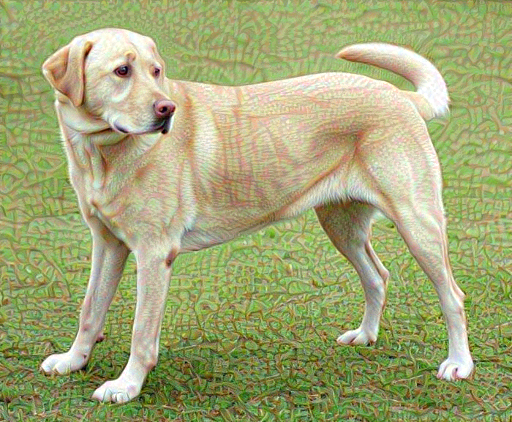

In [ ]:
train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)

We're now going to perform longer optimization.

We are going to measure the optimization time. For this, we are going to import *time* library. Then, we are going to define the *start* time. 

In this step, we are going to define the training hyperparameters such as *epochs*, *steps_per_epoch*, and *step*. The number of epochs is the number of times we are going to train the network. 

We are going to do a for loop to train the network *n* (*epochs*) times. Then, we are going to do a nested for loop to do *m* *(steps_per_epoch)* steps per epoch. In this nested loop, we are using the *train_step* function to do a training step and display the generated image.

In the end, we are going to take the time optimization time. 


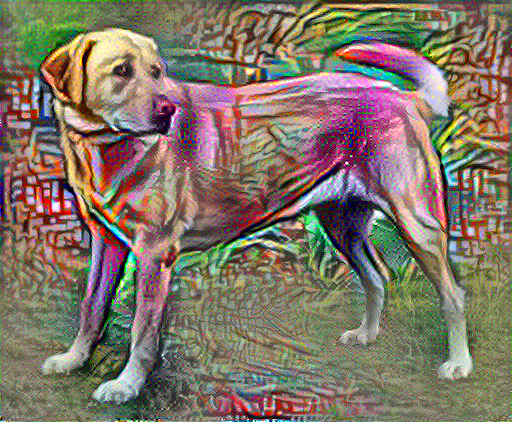

Train step: 600
.................

In [ ]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))
  
end = time.time()
print("Total time: {:.1f}".format(end-start))

## Total variation loss

Using the last implementation, we have a high-frequency-artifacts problem. To decrease this problem, we are going to use an explicit regularization term on the high-frequency components of the image. This is called *total variation loss*.

For this, we are going to define the *high_pass_x_y* function, where we are going to add the regularization term to the image. This function returns a horizontal delta and a vertical delta. This function is like an edge detector of its horizontal and vertical edges.  
 

In [ ]:
def high_pass_x_y(image):
  x_var = image[:,:,1:,:] - image[:,:,:-1,:]
  y_var = image[:,1:,:,:] - image[:,:-1,:,:]

  return x_var, y_var

In [ ]:
x_deltas, y_deltas = high_pass_x_y(content_image)

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Original")

plt.subplot(2,2,2)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Original")

x_deltas, y_deltas = high_pass_x_y(image)

plt.subplot(2,2,3)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

plt.subplot(2,2,4)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled")

The regularization loss associated with this is the sum of the squares of the values.

Now, we are going to define the *total_variation_loss* function. First, we are going to get the horizontal and vertical edges (*x_deltas* and *y_deltas*), then we are going to add the *reduce_sum* of these values. 

In [ ]:
def total_variation_loss(image):
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))

In [ ]:
total_variation_loss(image).numpy()

That demonstrated what it does. 

But there's no need to implement it yourself. TensorFlow has its own total variation loss function called *total_variation*. 

In [ ]:
tf.image.total_variation(image).numpy()

## Re-run the optimization

We're now going to re-run the optimization using *tf.image.total_variation* function. First, we choose a weight for the `total_variation_loss`.

In [ ]:
total_variation_weight=30

In this step, we are going to update the *train_step* adding the weighted total variation loss to the *loss* variable. 

In [ ]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)
    loss += total_variation_weight*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

Reinitialize the optimization variable, which has the content_image shape:

In [ ]:
image = tf.Variable(content_image)

Run the optimization:

In [ ]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

Finally, save the result:

In [ ]:
file_name = 'stylized-image.png'
tensor_to_image(image).save(file_name)

try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download(file_name)